# Machine Learning for Level Truncation in Open String Field Theory

Harold Erbin, Riccardo Finotello, Matej Kudrna, Martin Schnabl

---
---

## Abstract

In the framework of bosonic Open String Field Theory (OSFT), we consider several observables characterised by conformal weight and type, and the position of vacua in the potential for various values of truncated mass level. We focus on the prediction of the extrapolated value for the level-$\infty$ truncation using Machine Learning (ML) techniques.

In this notebook we focus on the $\mathrm{SU}(2)$ WZW model and its properties arising from unsupervised learning such as the PCA.

In [1]:
%load_ext autoreload
%autoreload 2

## Load the Dataset

We load the tidy dataset and prepare for the EDA by dropping duplicates and looking at its properties:

In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('./data/data_wzw.csv')

In [3]:
# remove the labels from the dataset
df = df.drop(columns=['exp_re', 'exp_im'])

## Scaling the Input

In what follows we focus on computing the singular values and the principal components of the truncation levels.
Given the outliers detected in the EDA, we scale the input features using a `RobustScaler` on the full dataset and on the imaginary parts, while we use a standard scaler for the real parts.

In [4]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler

df_full = df.filter(regex='^level.*')
df_re   = df.filter(regex='^level.*_re')
df_im   = df.filter(regex='^level.*_im')

# scale the input
df_full = pd.DataFrame(RobustScaler().fit_transform(df_full), columns=df_full.columns)
df_re   = pd.DataFrame(StandardScaler().fit_transform(df_re), columns=df_re.columns)
df_im   = pd.DataFrame(RobustScaler().fit_transform(df_im), columns=df_im.columns)

# save to file
df_full.to_csv('./data/data_wzw_levels_scaled.csv')
df_re.to_csv('./data/data_wzw_levels_re_scaled.csv')
df_im.to_csv('./data/data_wzw_levels_im_scaled.csv')

## Singular Value Decomposition

We first study the singular value decomposition (SVD) of the truncation levels:

In [5]:
!python3 ./scripts/svd.py --re './data/data_wzw_levels_re_scaled.csv' \
                          --im './data/data_wzw_levels_im_scaled.csv' \
                          --full './data/data_wzw_levels_scaled.csv' \
                          --output 'svd'

SVD computed in 0.315 seconds


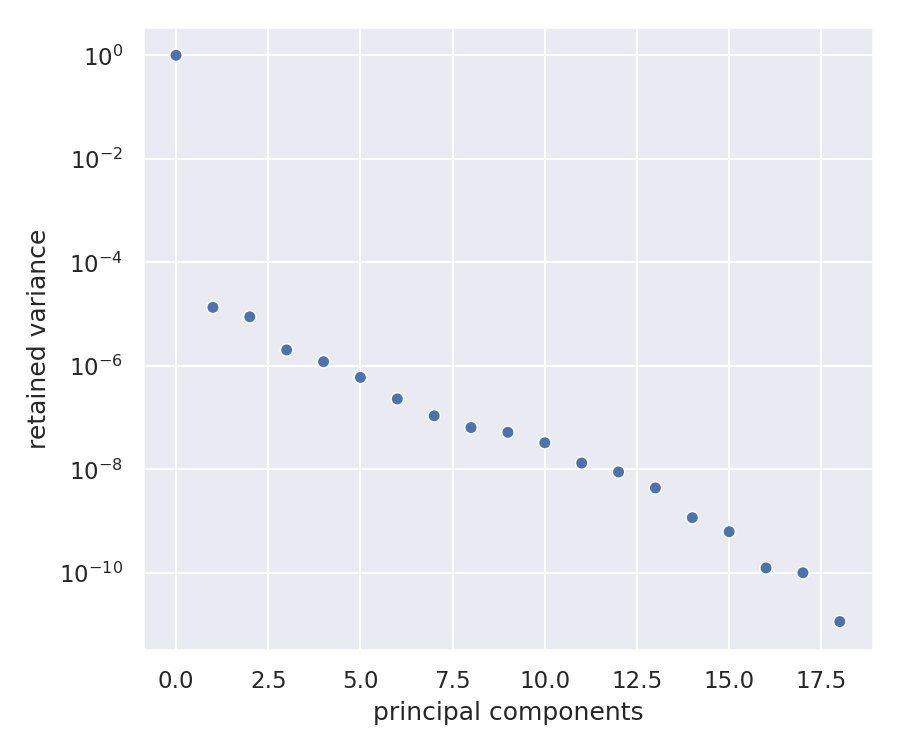

In [6]:
from IPython.display import Image
Image('./img/svd_tot.png', width=480)

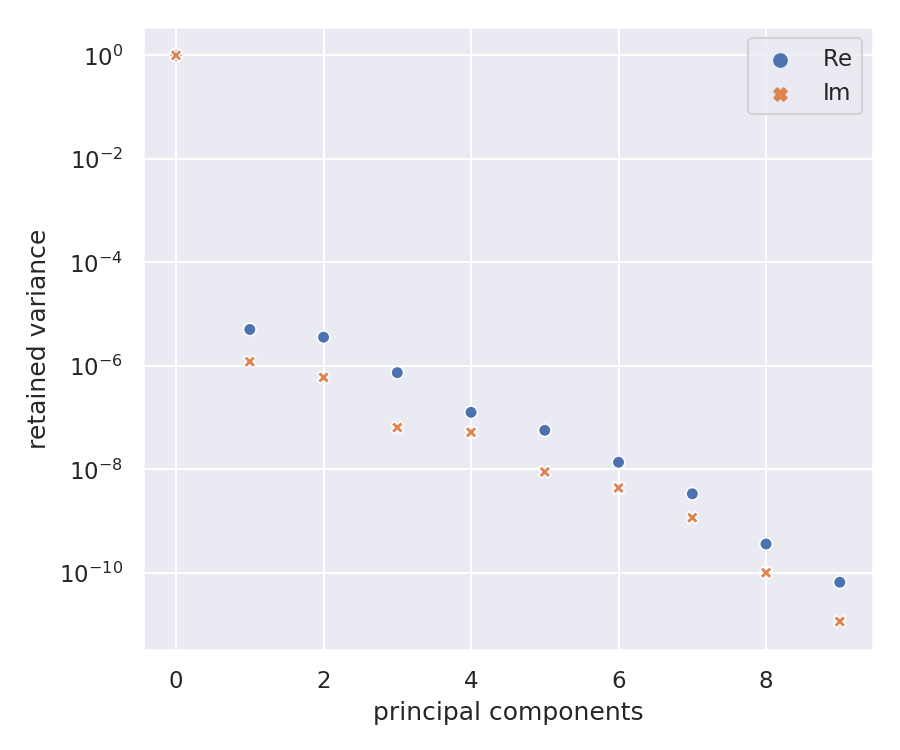

In [7]:
from IPython.display import Image
Image('./img/svd_sep.png', width=480)

It seems that in general one components is enough in all cases.

In [8]:
svd = pd.read_csv('./data/svd_tot.csv')

# show the components which retain more than 1.0e-6 of the variance
svd.loc[(svd['full'] > 1.0e-6)]

,full
0,0.999973
1,0.000013
2,0.000009
3,0.000002
4,0.000001


In [9]:
svd = pd.read_csv('./data/svd_sep.csv')

# show the components which retain more than 1.0e-6 of the variance
svd.loc[(svd['re'] > 1.0e-6) |
        (svd['im'] > 1.0e-6)
       ]

,re,im
0,0.999990,9.999981e-01
1,0.000005,1.204072e-06
2,0.000004,5.980563e-07
